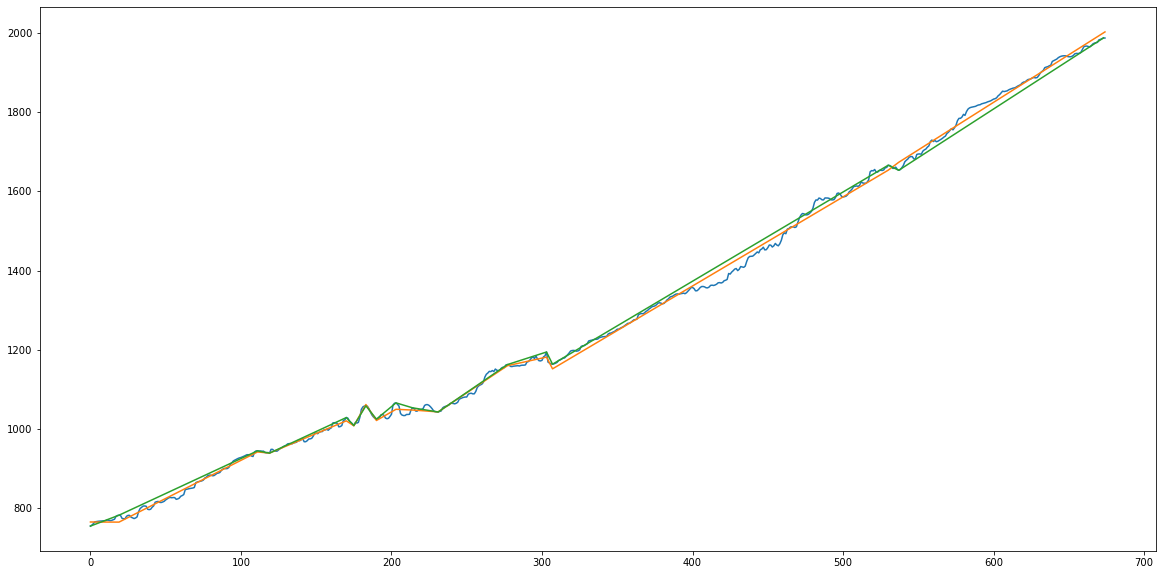

In [87]:
import xml.etree.ElementTree as ET
from scipy.signal import argrelextrema
import numpy as np
import matplotlib.pyplot as plt
import pwlf

tree = ET.parse("./joly.gpx")

all_altitudes = []

for element in tree.iter():
    if element.tag == '{http://www.topografix.com/GPX/1/1}ele':
        all_altitudes.append(float(element.text))

order = round(len(all_altitudes)/100)

y = np.array(all_altitudes)
x = np.array([i for i,j in enumerate(y)])

model = pwlf.PiecewiseLinFit(x,y)

max_breaks = argrelextrema(y,np.greater,order=order,mode='wrap')
min_breaks = argrelextrema(y,np.less,order=order,mode='wrap')

breakpoints = np.concatenate((max_breaks,min_breaks),axis=1)
breakpoints = sorted(breakpoints.tolist()[0])

model.fit_with_breaks(breakpoints)
y_hat = model.predict(x)

plt.figure(figsize=(20,10))
plt.plot(x,y,)
plt.plot(x,y_hat)
plt.plot(breakpoints,[y[i] for i in breakpoints])
plt.show()

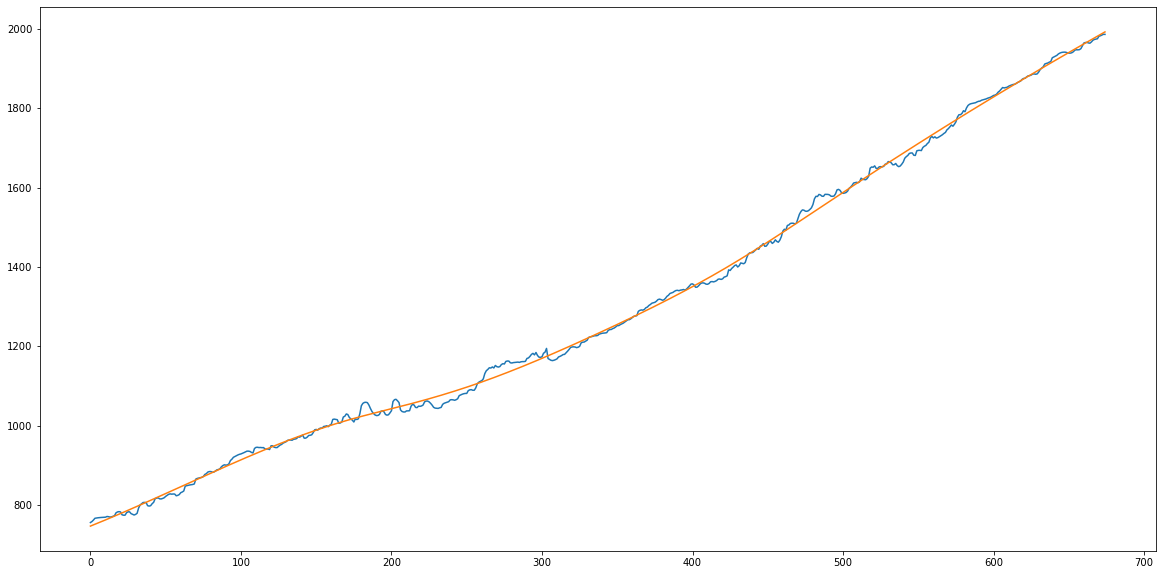

[]

In [94]:
from scipy.interpolate import UnivariateSpline

tree = ET.parse("./joly.gpx")

all_altitudes = []

for element in tree.iter():
    if element.tag == '{http://www.topografix.com/GPX/1/1}ele':
        all_altitudes.append(float(element.text))

y = np.array(all_altitudes)
x = np.array([i for i,j in enumerate(y)])

spl = UnivariateSpline(x,y,s=100000)
splined_y = spl(x)

model = pwlf.PiecewiseLinFit(x,splined_y)

order = round(len(all_altitudes)/60)

max_breaks = argrelextrema(splined_y,np.greater,order=order)
min_breaks = argrelextrema(splined_y,np.less,order=order)

breakpoints = np.concatenate((max_breaks,min_breaks),axis=1)
breakpoints = sorted(breakpoints.tolist()[0])

plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.plot(x,splined_y)
plt.plot(breakpoints,[y[i] for i in breakpoints],'xr')
plt.show()

breakpoints

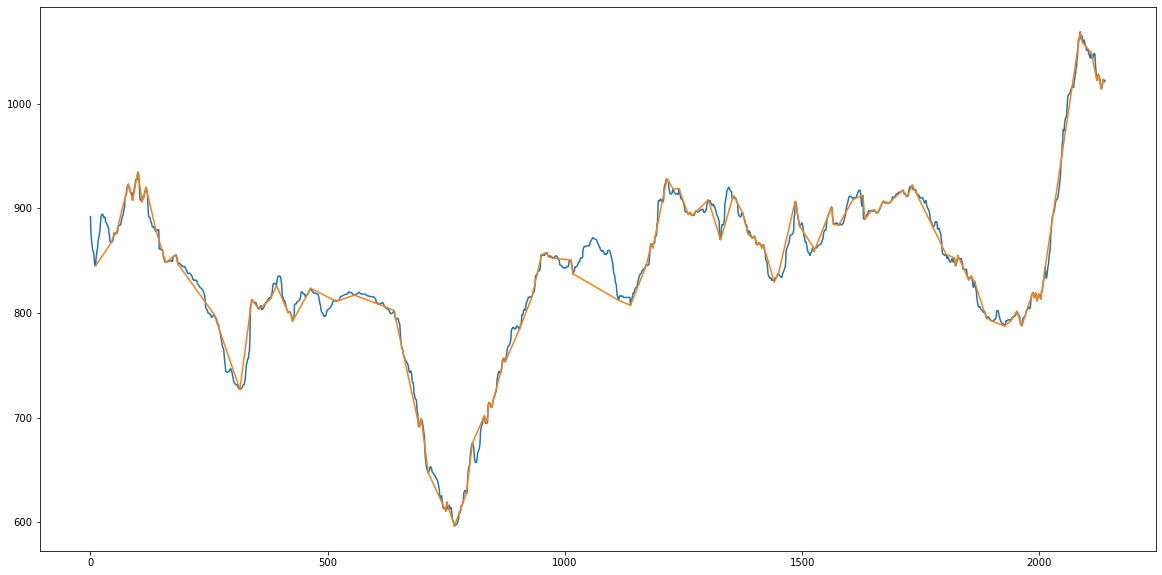

In [50]:
import xml.etree.ElementTree as ET
from scipy.signal import argrelextrema
import numpy as np
import matplotlib.pyplot as plt
import pwlf

tree = ET.parse("./test.gpx")

all_altitudes = []

for element in tree.iter():
    if element.tag == '{http://www.topografix.com/GPX/1/1}ele':
        all_altitudes.append(float(element.text))

order = round(len(all_altitudes)/500)

y = np.array(all_altitudes)
x = np.array([i for i,j in enumerate(y)])

max_breaks = argrelextrema(y,np.greater,order=order)
min_breaks = argrelextrema(y,np.less,order=order)

breakpoints = np.concatenate((max_breaks,min_breaks),axis=1)
breakpoints = sorted(breakpoints.tolist()[0])

plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.plot(breakpoints,[y[i] for i in breakpoints])
plt.show()